In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Get data by importing spreadsheet weatherHistory.csv

In [2]:
dataset = pd.read_csv('weatherHistory.csv')

# Number of rows and columns in the dataset

In [3]:
print(dataset.shape)

(96453, 12)


# Statistical details of the dataset

In [4]:
print(dataset.describe())

       Temperature (C)  Apparent Temperature (C)      Humidity  \
count     96453.000000              96453.000000  96453.000000   
mean         11.932678                 10.855029      0.734899   
std           9.551546                 10.696847      0.195473   
min         -21.822222                -27.716667      0.000000   
25%           4.688889                  2.311111      0.600000   
50%          12.000000                 12.000000      0.780000   
75%          18.838889                 18.838889      0.890000   
max          39.905556                 39.344444      1.000000   

       Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
count       96453.000000            96453.000000     96453.000000     96453.0   
mean           10.810640              187.509232        10.347325         0.0   
std             6.913571              107.383428         4.192123         0.0   
min             0.000000                0.000000         0.000000         0.0   


# Here I wanted to see that the dataset matched the excel spreadsheet

In [5]:
dataset.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


# Select the two variables Humidity and Apparent Tempature

In [6]:
humidity = dataset['Humidity']
apparentTemperature = dataset['Apparent Temperature (C)']

# Checking the variables below

In [7]:
humidity.head()

0    0.89
1    0.86
2    0.89
3    0.83
4    0.83
Name: Humidity, dtype: float64

In [8]:
apparentTemperature.head()

0    7.388889
1    7.227778
2    9.377778
3    5.944444
4    6.977778
Name: Apparent Temperature (C), dtype: float64

# 2-D Graph showing the relationship between the two variables

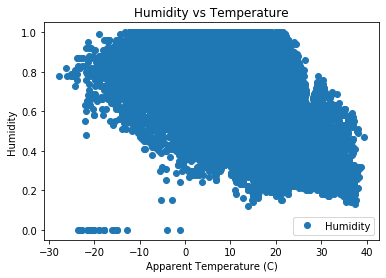

In [9]:
dataset.plot(x='Apparent Temperature (C)', y='Humidity', style='o')
plt.title('Humidity vs Temperature')
plt.xlabel('Apparent Temperature (C)')
plt.ylabel('Humidity')
plt.show()

# Plot of the Apparent Tempature (C) which will be predicted

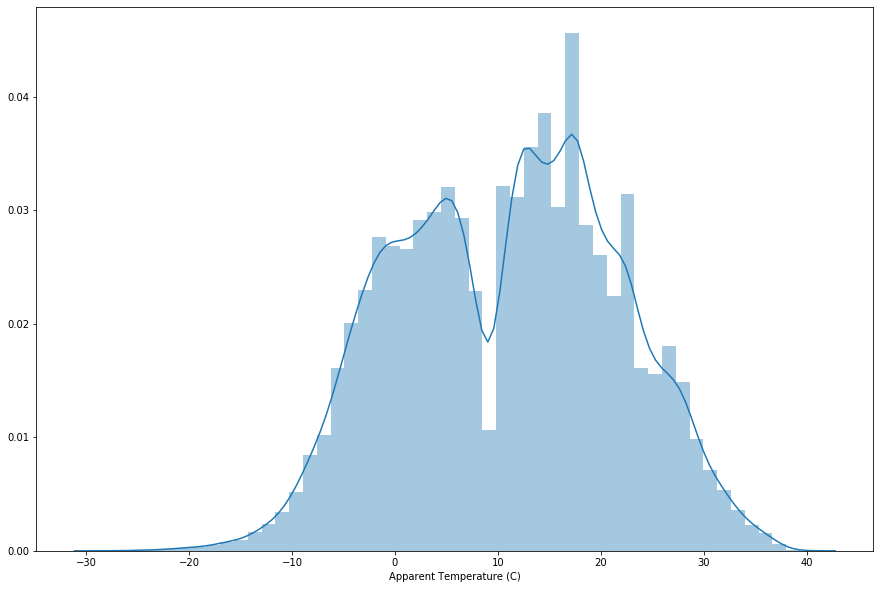

In [10]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['Apparent Temperature (C)'])

# X is the input data which is humidity and y is the variable to be predicted which is apparent tempature

In [11]:
X = dataset['Humidity'].values.reshape(-1,1)
y = dataset['Apparent Temperature (C)'].values.reshape(-1,1)

# Split the data 80% will be used for training and 20% will be used to test the accuracy of the prediction

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=0)

# Using LinearRegression to train the alogorithm

In [13]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Getting Intercept and Slope values

In [14]:
print('Intercept Value: ', regressor.intercept_)
print('Slope Value: ', regressor.coef_)

Intercept Value:  [35.14500169]
Slope Value:  [[-33.05962143]]


# Alogrithm has been trained now lets predict

In [15]:
y_pred = regressor.predict(X_test)

# List of the actual and predicted values

In [16]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted':
y_pred.flatten()})
print(df)

          Actual  Predicted
0      14.422222   4.399554
1      12.155556  11.342074
2      23.961111  14.978633
3      15.000000   6.383131
4      12.800000   9.689093
...          ...        ...
19286  28.255556  22.912942
19287  17.216667   4.399554
19288  -1.000000   4.730150
19289   7.327778   4.399554
19290  16.061111  11.342074

[19291 rows x 2 columns]


# A visual comparson of the first 30 Actual versus Predicted Values

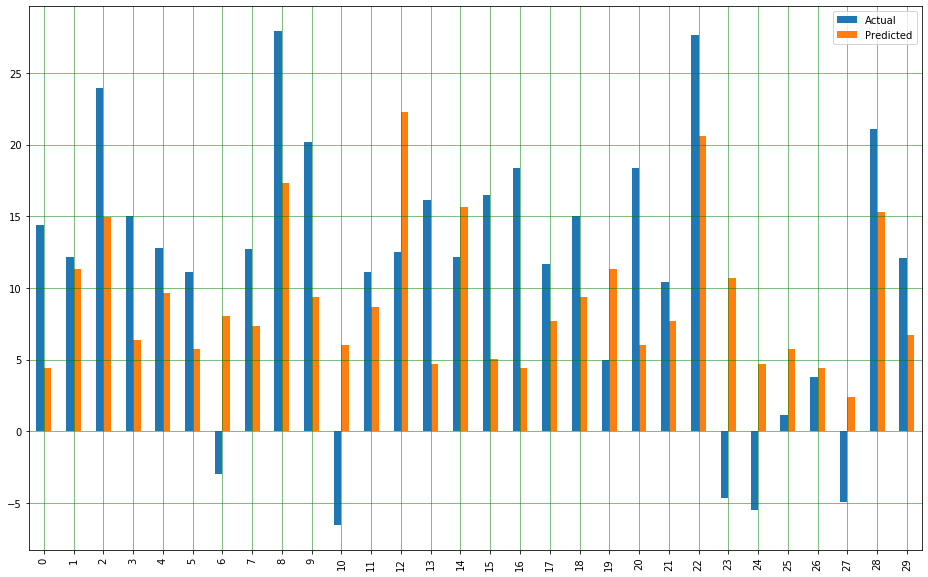

In [17]:
df1 = df.head(30)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Plot a straight line through the test data

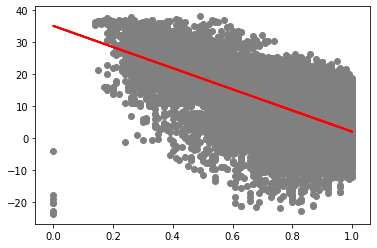

In [18]:
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

# Now to evalute the algorithm's performance.

In [19]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',
np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 6.943505877301024
Mean Squared Error: 72.90295726718273
Root Mean Squared Error: 8.538322860327005


# Answers to the initial questions:

1.	Is there a relationship between Humidity and Apparent Temperature?
2.	Can we predict the Apparent Temperature using Humidity?

There is a relationship between humidity and apparent tempature.  The relationship is that we can predict the humidity using apparent tempature but not the other way around.  I decided to switch the varaibles as the chart above shows a very bad prediction using humidity to predict apparent tempature.  When I switched the variables the predictions and actuals where very close and much better than above.  But a visual chart is not enough as we are only looking at 30 observations.  I then decided to use the RMSE (Room Mean Square Error) to detirmine this.  The numbers are as follows:

Predict the apparent temperature using humidity
Mean temp = 10.855
RMSE = 8.5383
Percentage of apparent temperature = 78.66%

Predict the humidity using apparent temperature
Mean humidity = 0.734899
RMSE = 0.1564333
Percentage of humidity = 21.29%


You can see on the above that the value of RMSE of using apparent tempature to predict humidity is 21.29% which is much lower and therefore more accurate than the other way around.  Using humidity to predict apparent tempature the value of RMSE is 78.66%.  This to me confirms to me my answer to question number two and that is that we cannot predict apparent temperature using humidity as the alogrithm is not accurate.  Predicting humidity using apparent temperature is more accurate based on the value of RMSE.  According to your notes, the RMSE is still not very accurate but can still make reasonbly good predictions.